# Lab 3.01 - The Central Limit Theorem

Import all necessary Python libraries.

In [116]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Probability theory

### Exercise 1 - Probabilities for normal distributions

Calculate the given probabilities in the standard normal distribution $Z \sim Nor(\mu=0, \sigma=1)$. Compare your solutions with the given answers.

|     | Calculate:             | Answer: |
| :-- | :--------------------- | :------ |
| 1.  | $P(Z < 1.33)$          | 0.908   |
| 2.  | $P(Z > 1.33)$          | 0.092   |
| 3.  | $P(Z < −1.33)$         | 0.092   |
| 4.  | $P(Z > −1.33)$         | 0.908   |
| 5.  | $P(Z < 0.45)$          | 0.674   |
| 6.  | $P(Z > −1.05)$         | 0.853   |
| 7.  | $P(Z < 0.65)$          | 0.742   |
| 8.  | $P(−0.45 < Z < 1.20)$  | 0.559   |
| 9.  | $P(−1.35 < Z < −0.10)$ | 0.372   |
| 10. | $P(−2.10 < Z < −0.90)$ | 0.166   |

In [117]:
m = 0
s = 1


values= [stats.norm.cdf(1.33, loc=m,scale=s), stats.norm.sf(1.33, loc=m,scale=s), stats.norm.cdf(-1.33, loc=m,scale=s), stats.norm.sf(-1.33, loc=m,scale=s), stats.norm.cdf(0.45, loc=m,scale=s), stats.norm.sf(-1.05, loc=m,scale=s), stats.norm.cdf(0.65, loc=m,scale=s), stats.norm.cdf(1.2, loc=m,scale=s)-stats.norm.cdf(-0.45, loc=m,scale=s), stats.norm.cdf(-0.1, loc=m,scale=s)-stats.norm.cdf(-1.35, loc=m,scale=s), stats.norm.cdf(-0.9, loc=m,scale=s)-stats.norm.cdf(-2.1, loc=m,scale=s)]


i = 1

for value in values:
    print("%d. = %.3f" % (i, value))
    i+=1



1. = 0.908
2. = 0.092
3. = 0.092
4. = 0.908
5. = 0.674
6. = 0.853
7. = 0.742
8. = 0.559
9. = 0.372
10. = 0.166


### Exercise 2 - Plot probability density
Make a graphical plot of the probability density function and the cumulative distribution function of a normal distribution with $\mu = 2.5$ and $\sigma = 1.5$.

What is the area under the density function between  x=0.5  and  x=4 . (Answer = 0.750)

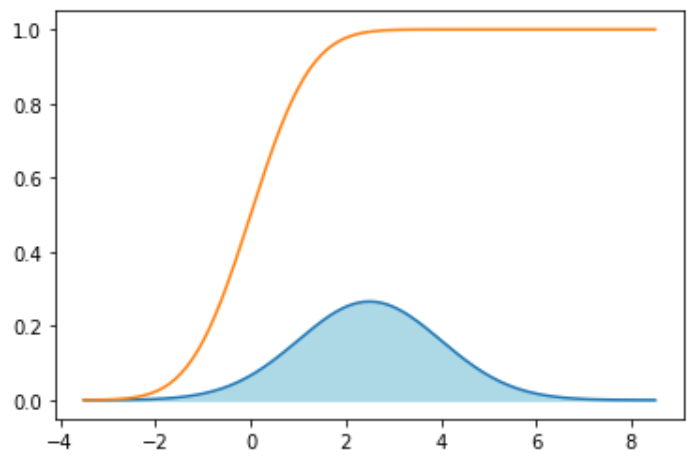

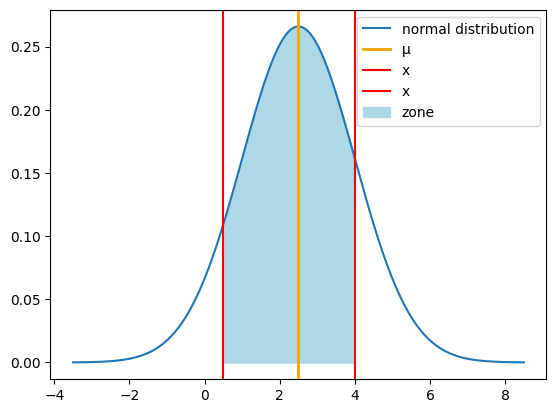

0.750133526342675

In [118]:
m = 2.5
s = 1.5

x1,x2=0.5, 4

# Gauss-curve
# X-values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=m, scale=s)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y, label="normal distribution")
# Hypothetical population mean in orange
dplot.axvline(m, color="orange", lw=2, label="µ")
# Sample mean in red
dplot.axvline(x1, color="red", label="x")
dplot.axvline(x2, color="red", label="x")
acc_x = np.linspace(x1, x2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=m, scale=s)
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue', label="zone")

plt.legend()
plt.show()

stats.norm.cdf(x2, loc=m,scale=s)-stats.norm.cdf(x1, loc=m,scale=s)

### Exercise 3 - Student t vs normal distribution
Make a graphical plot of the probability density function and the cumulative distribution function for the Student's t-distribution with 3 degrees of freedom.  
Also make a graphical plot of the standard normal distribution, so you can compare both.

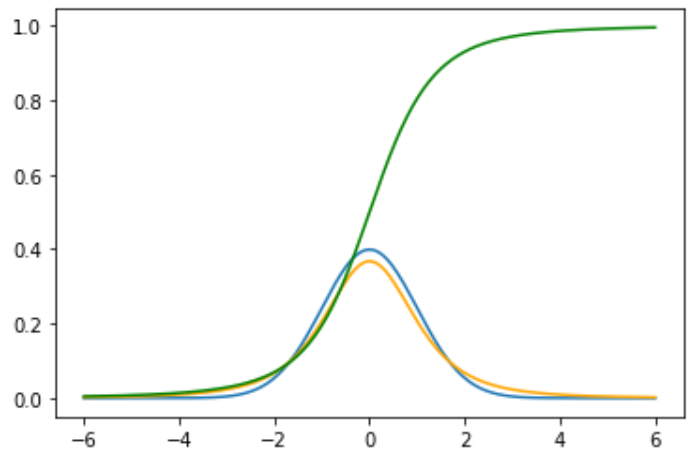

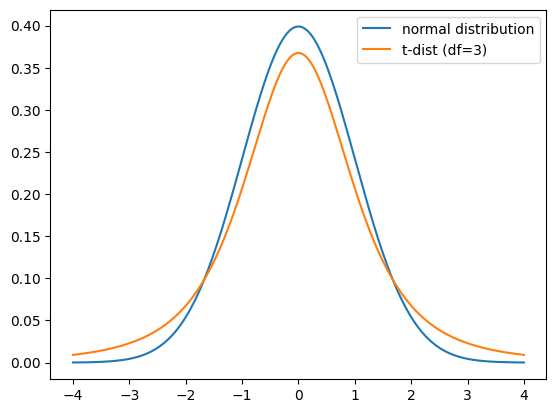

In [119]:
m = 0
s = 1
df=3

# Gauss-curve
# X-values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
## norm
# Y-values
dist_y_norm = stats.norm.pdf(dist_x, loc=m, scale=s)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y_norm, label="normal distribution")

# t-dist
# Y-values
dist_y_t = stats.t.pdf(dist_x, df=df)

# Plot
dplot.plot(dist_x, dist_y_t, label="t-dist (df=3)")



plt.legend()
plt.show()



### Exercise 4 - Theoretical vs real probability density
Generate 25 random numbers distributed according to the standard normal distribution. Plot a histogram with probability density function and the theoretical probability density.  
Do the same for 250 and 2500 numbers.   
Notice how the real probability density approaches the theoretical one as the sample size increases.

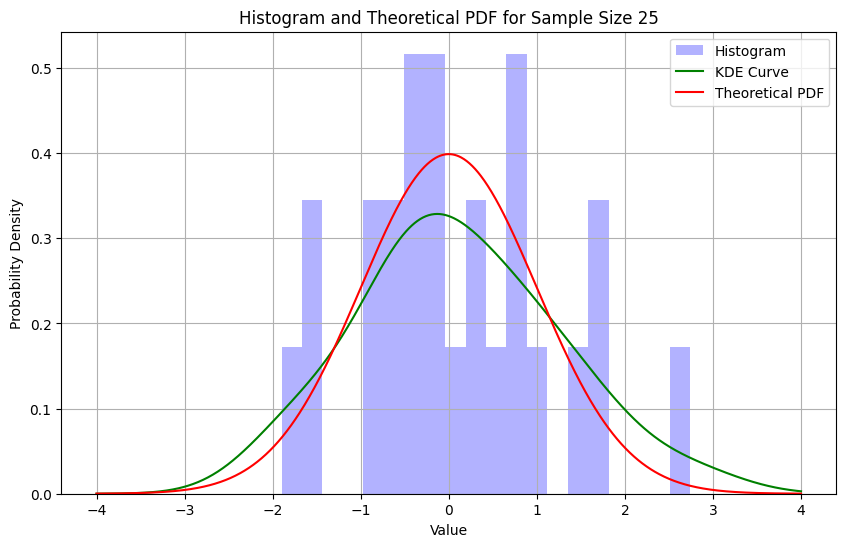

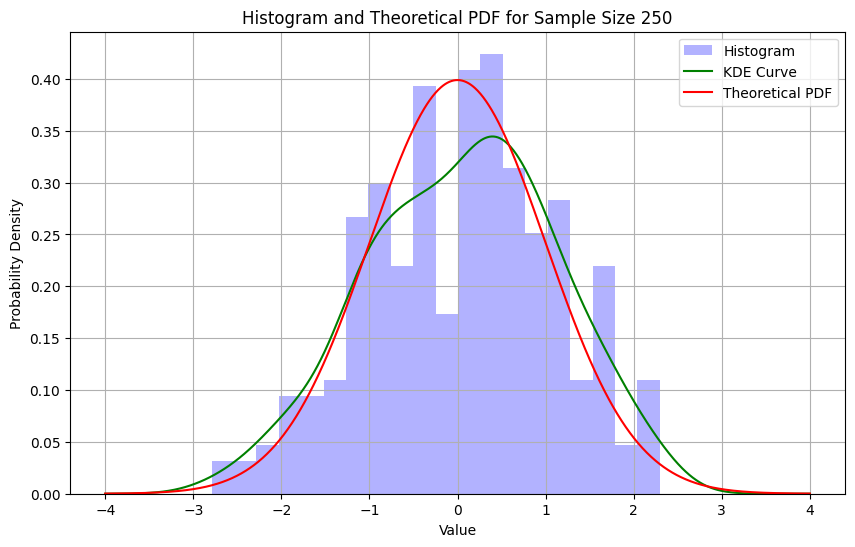

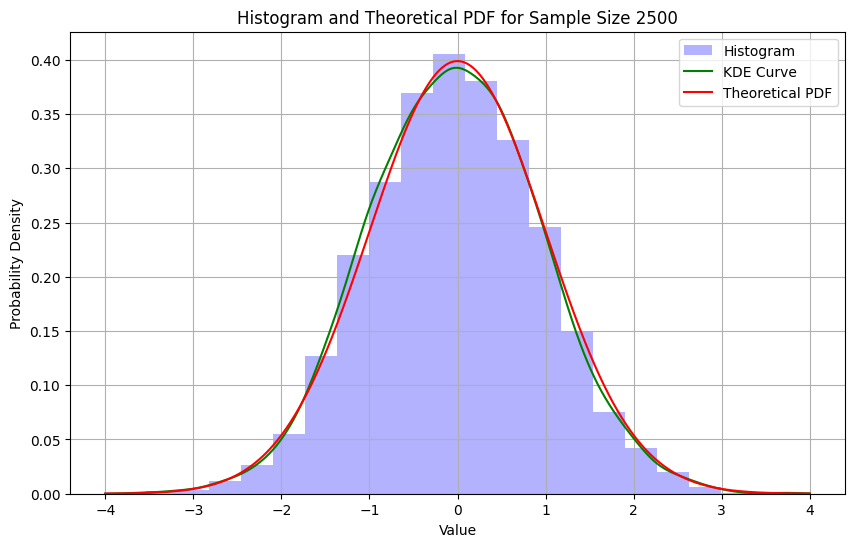

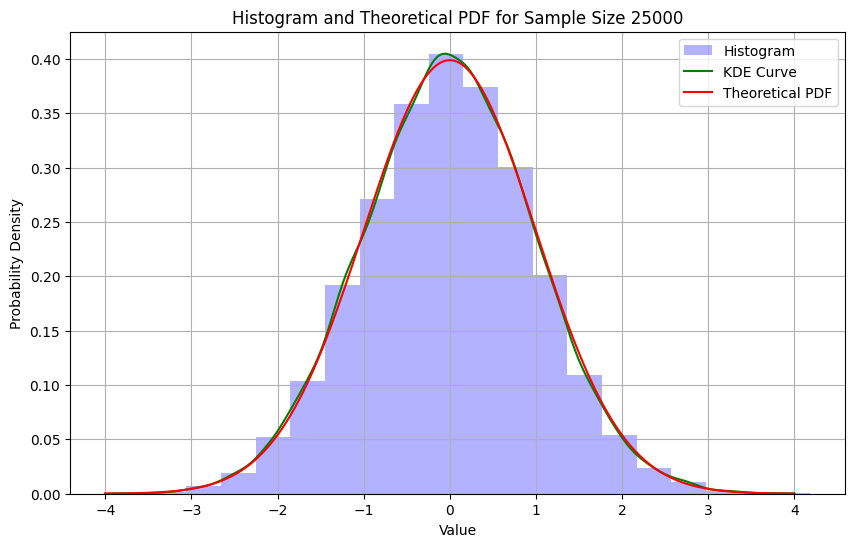

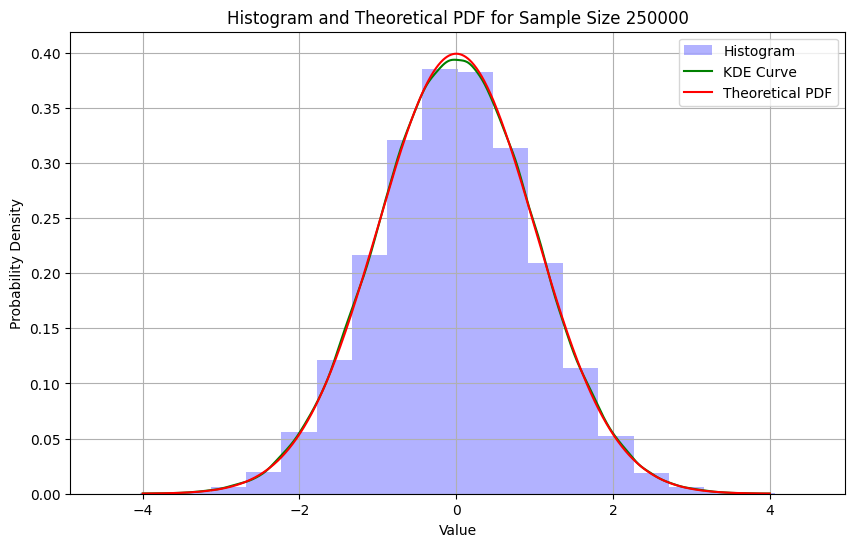

In [120]:
# Parameters
sample_sizes = [25, 250, 2500, 25000,250000]
num_bins = 20

# Generate random numbers for each sample size
for size in sample_sizes:
    # Generate random numbers from the standard normal distribution
    random_numbers = np.random.normal(size=size)
    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(random_numbers, bins=num_bins, density=True, alpha=0.3, color='blue', label='Histogram')
    
    # Plot the KDE curve
    kde = stats.gaussian_kde(random_numbers)
    x = np.linspace(-4, 4, 1000)
    kde_curve = kde(x)
    plt.plot(x, kde_curve, color='green', label='KDE Curve')
    
    # Plot the theoretical probability density function (PDF)
    x = np.linspace(-4, 4, 1000)
    pdf = stats.norm.pdf(x, loc=0, scale=1)
    plt.plot(x, pdf, color='red', label='Theoretical PDF')
    
    plt.title(f'Histogram and Theoretical PDF for Sample Size {size}')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()


### Exercise 5 - Cholesterol 
A health survey between 1988 and 1994 indicated that the mean cholesterol value for women between the age of 20 and 29 was 183 mg/dl, with a standard deviation equal to 36. We now take a random sample of 81 women.

1. Plot the probability distribution of the sample mean $\overline{x}$.
2. What is the probability of the sample mean being $\overline{x} < 185$? (Answer ≈ 69,1%)
3. What is the probability of $175 < \overline{x} < 185$ (Answer ≈ 66,9%)
4. What is the probability of $\overline{x} > 190$ (Answer ≈ 4,0%)



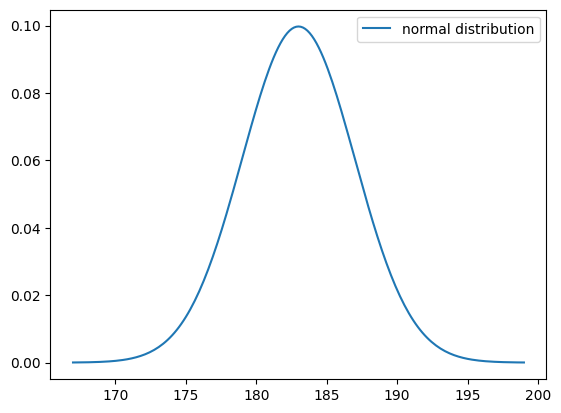

2. : 69.1
3. : 66.9
4. : 4.0


In [121]:
import math

# gegeven
mean = 183
sigma= 36
n = 81

s = sigma/math.sqrt(n)
# Gauss-curve
# X-values
dist_x = np.linspace(mean - 4 * s, mean + 4 * s, num=201)
## norm
# Y-values
dist_y_norm = stats.norm.pdf(dist_x, loc=mean, scale=s)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y_norm, label="normal distribution")

plt.legend()
plt.show()

i= 1
values= [stats.norm.cdf(185, loc=mean, scale=s), stats.norm.cdf(185, loc=mean,scale=s)-stats.norm.cdf(175, loc=mean, scale=s), stats.norm.sf(190,loc=mean,scale=s)]

for value in values:
    i+=1
    print("%d. : %.1f" %(i, value*100))

### Exercise 6
A random sample of 64 is drawn from a population with unknown distribution. However, the expectation and standard deviation of the population are known: $\mu = 20$ and $\sigma = 16$.

1. Plot the probability distribution of the sample mean.
2. Calculate the z-score for $\overline{x_1} = 15.5$  
3. Calculate the z-score for $\overline{x_2} = 23$ 
4. Determine the probability that 16 < $\overline{x}$ < 22 (Answer ≈ 81.9%)


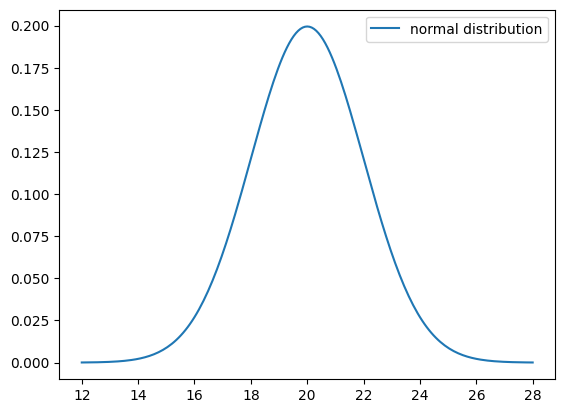

2. : -2.2
3. : 1.5
4. : 81.9


In [122]:
import math

def berekenZscore(waarde, mean, sigma):
    return (waarde-mean)/sigma

# gegeven
mean = 20
sigma = 16
n = 64

# bereken

s = sigma/math.sqrt(n)

# question 1
# Gauss-curve
# X-values
dist_x = np.linspace(mean - 4 * s, mean + 4 * s, num=201)
## norm
# Y-values
dist_y_norm = stats.norm.pdf(dist_x, loc=mean, scale=s)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y_norm, label="normal distribution")

plt.legend()
plt.show()

values= [berekenZscore(15.5, mean, s), berekenZscore(23, mean, s), (stats.norm.cdf(22, loc=mean, scale=s)-stats.norm.cdf(16, loc=mean, scale=s))*100]

i=1
for value in values:
    i+=1
    print("%d. : %.1f" %(i, value))

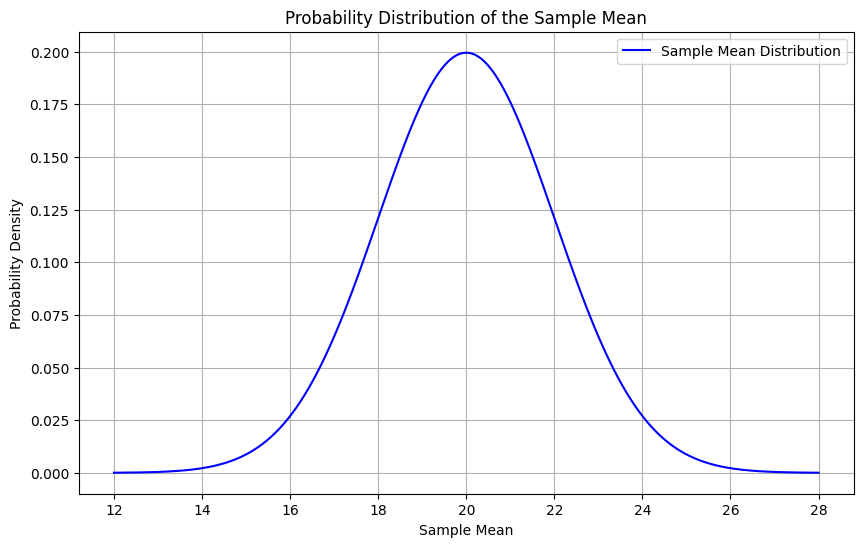

Z-score for x̄1 = 15.5: -2.2500
Z-score for x̄2 = 23: 1.5000
Probability that 16 < x̄ < 22: 0.8186


In [123]:
# CHAT-GPT

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Population parameters
mu = 20
sigma = 16
sample_size = 64

# Calculate the standard error of the sample mean (standard deviation of the sample distribution)
se = sigma / np.sqrt(sample_size)

# 1. Plot the probability distribution of the sample mean.
x = np.linspace(mu - 4*se, mu + 4*se, 1000)
pdf = stats.norm.pdf(x, loc=mu, scale=se)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', label='Sample Mean Distribution')
plt.title('Probability Distribution of the Sample Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# 2. Calculate the z-score for x̄1 = 15.5
x1 = 15.5
z1 = (x1 - mu) / se
print(f"Z-score for x̄1 = 15.5: {z1:.4f}")

# 3. Calculate the z-score for x̄2 = 23
x2 = 23
z2 = (x2 - mu) / se
print(f"Z-score for x̄2 = 23: {z2:.4f}")

# 4. Determine the probability that 16 < x̄ < 22
lower_bound = 16
upper_bound = 22
prob_between = stats.norm.cdf(upper_bound, loc=mu, scale=se) - stats.norm.cdf(lower_bound, loc=mu, scale=se)
print(f"Probability that {lower_bound} < x̄ < {upper_bound}: {prob_between:.4f}")


## Confidence Intervals

## Exercise 7 - rlanders
Load the dataset data/rlanders.csv. Use the column Money.  
We assume that the values from this sample are normally distributed around a population mean $\mu$ that is unknown, but that the standard deviation of the population is known, i.e. $\sigma = 98$.


In [124]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])
# Show the first few records of the Data Frame
df.tail()

,Gender,Money,Days,Months,Count,Survey
ID,,,,,,
246,Male,491,22,11,47,2
247,Female,479,20,14,51,3
248,Male,637,33,7,48,4
249,Male,442,30,12,44,5
250,Female,734,25,8,51,3


Calculate a 99% confidence interval for the population mean (Answer: [484.191, 516.121]).

In [125]:
# Extract the Money column
money_data = df['Money']

# Given values
sample_mean = np.mean(money_data)
sample_size = len(money_data)
sigma = 98  # Population standard deviation
confidence_level = 0.99

# Calculate the standard error of the mean
se = sigma / np.sqrt(sample_size)

# Calculate the margin of error
z_critical = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * se

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Confidence Interval: {confidence_interval}")

Sample Mean: 500.16
Confidence Interval: (484.1908445724813, 516.1211554275187)


In [126]:
import math


sigma = 98/math.sqrt(df.Money.count())

alpha = 0.99

mean_sample = df["Money"].mean()

margin_of_error = sigma*stats.norm.isf((1-alpha)/2, loc=0, scale=1) 

g1 = mean_sample-margin_of_error
g2 = mean_sample+margin_of_error

print("Het interval is: [%.4f, %.4f]"%(g1,g2))


Het interval is: [484.1908, 516.1212]


Calculate a 95% confidence interval for the population mean. (Answer =  [488.008, 512.304])

In [127]:
import math

# gegeven
sigma_pop = 98
alpha = 0.95


#Bereken sample waardes
sigma_sample = sigma_pop/math.sqrt(df.Money.count())
mean_sample =df.Money.mean()
# z-score vd onzekerheid
z_score_alpha = stats.norm.isf((1-alpha)/2, loc=0, scale=1)
# speling links/rechts adhv onzekerheid
margin_of_error = z_score_alpha * sigma_sample

print("Het interval is: [%.4f, %.4f]"%(mean_sample-margin_of_error, mean_sample+margin_of_error))

Het interval is: [488.0080, 512.3040]


Suppose σ is unknown, calculate a 95% confidence interval for the population mean. (Answer = [487.319, 512.993])

In [128]:
# gegeven 
alpha = 0.95
data = df.Money

# bereken
mean_sample = data.mean()
sigma_sample = math.sqrt(data.std())

# z-score onzekerheid
z_score_alpha = stats.norm.isf((1-alpha)/2, loc=0, scale=1)

# speling adhv z-score en sigma
margin_of_error = z_score_alpha*sigma_sample


print("Het interval is: [%.4f, %.4f]"%(mean_sample-margin_of_error, mean_sample+margin_of_error))

Het interval is: [480.2592, 520.0528]


Finally, suppose the sample consists of only the first 25 observations in this dataset. Calculate a 95% confidence interval for this situation.  
(Answer = [450.291,536.669])

In [130]:
# gegeven 
alpha = 0.95
data = df.Money[:25]

# bereken
mean_sample = data.mean()
sample_size= data.count()
sigma_sample = np.std(data,ddof=1)
se=sigma_sample/np.sqrt(sample_size)
dgf = sample_size-1

# z-score onzekerheid
t_score_alpha = stats.t.isf((1-alpha)/2, dgf)

# speling adhv z-score en sigma
margin_of_error = t_score_alpha*se


print("Het interval is: [%.4f, %.4f]"%(mean_sample-margin_of_error, mean_sample+margin_of_error))

Het interval is: [450.2912, 536.6688]


In [96]:
import scipy.stats as stats

# Load the dataset
data = df

# Extract the first 25 observations from the Money column
money_data = data['Money'][:25]

# Given values
sample_mean = np.mean(money_data)
sample_size = len(money_data)
confidence_level = 0.95

# Calculate the sample standard deviation
sample_std = np.std(money_data, ddof=1)  # ddof=1 for sample standard deviation

# Calculate the standard error of the mean
se = sample_std / np.sqrt(sample_size)

# Degrees of freedom for t-distribution
df = sample_size - 1

# Calculate the t-critical value
t_critical = stats.t.ppf((1 + confidence_level) / 2, df)

# Calculate the margin of error
margin_of_error = t_critical * se

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Confidence Interval: {confidence_interval}")

Sample Mean: 493.48
Confidence Interval: (450.29120764817304, 536.6687923518269)
